In [1]:
import napari 
from yt_napari.viewer import layers_to_yt
import yt 

v = napari.Viewer()

In [2]:
v.open_sample(
    plugin = 'napari', 
    sample = 'kidney',
)

[<Image layer 'nuclei' at 0x73524d273490>,
 <Image layer 'WGA' at 0x73524d12bd00>,
 <Image layer 'actin' at 0x73524cc06f20>]

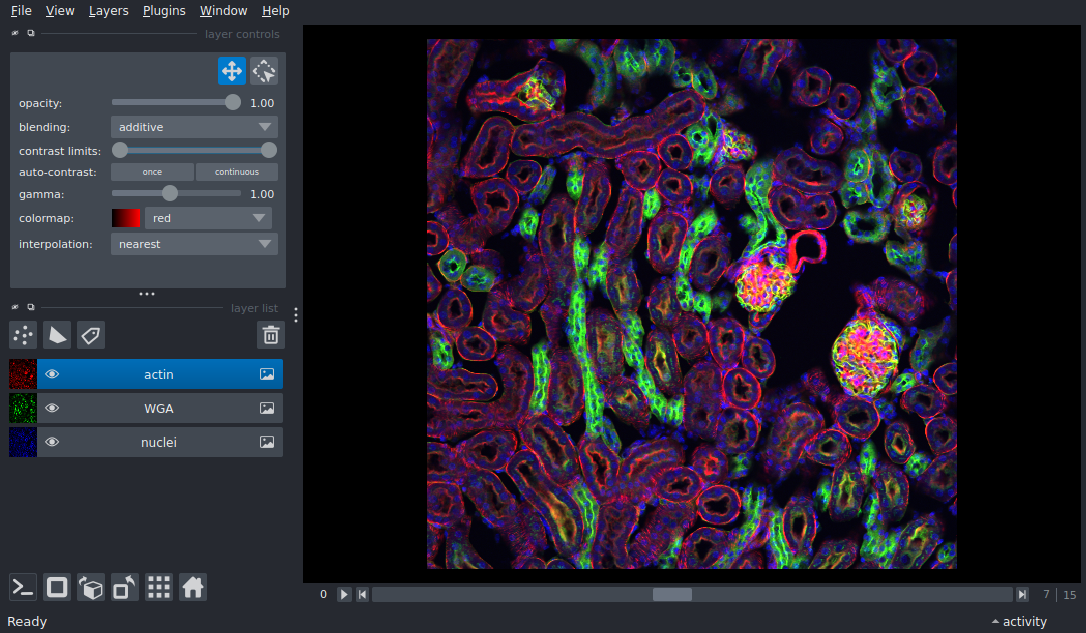

In [3]:
from napari.utils import nbscreenshot
nbscreenshot(v) 

In [4]:
ds = layers_to_yt(v, axis_order=('z', 'y', 'x'))

yt : [INFO     ] 2024-11-21 12:35:18,858 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-21 12:35:18,859 Parameters: domain_dimensions         = [ 16 512 512]
yt : [INFO     ] 2024-11-21 12:35:18,861 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-11-21 12:35:18,866 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-11-21 12:35:18,870 Parameters: cosmological_simulation   = 0



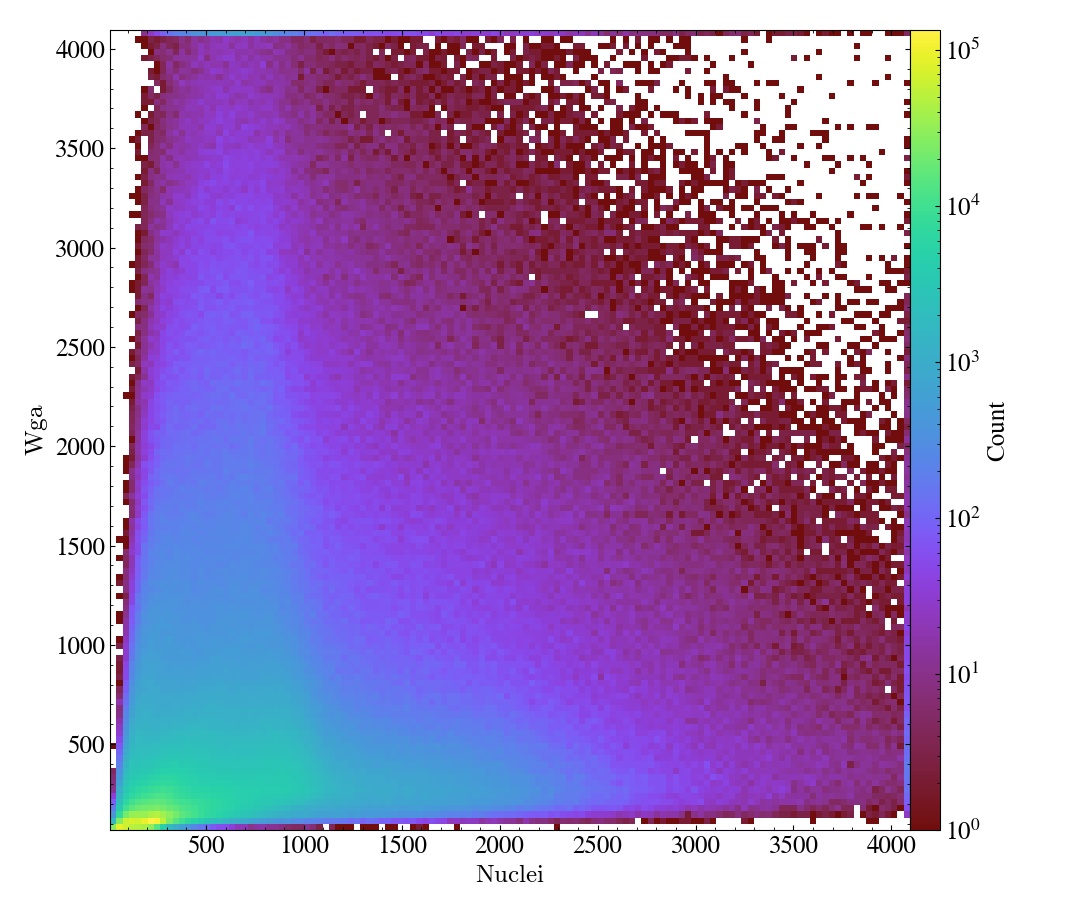

In [5]:
pp = yt.PhasePlot(ds, ('stream', 'nuclei'), ('stream', 'WGA'), ('index', 'ones'), weight_field=None)
pp.set_log(('stream', 'nuclei'), False)
pp.set_log(('stream', 'WGA'), False)
pp.set_colorbar_label(('index', 'ones'), 'Count')
pp.show()


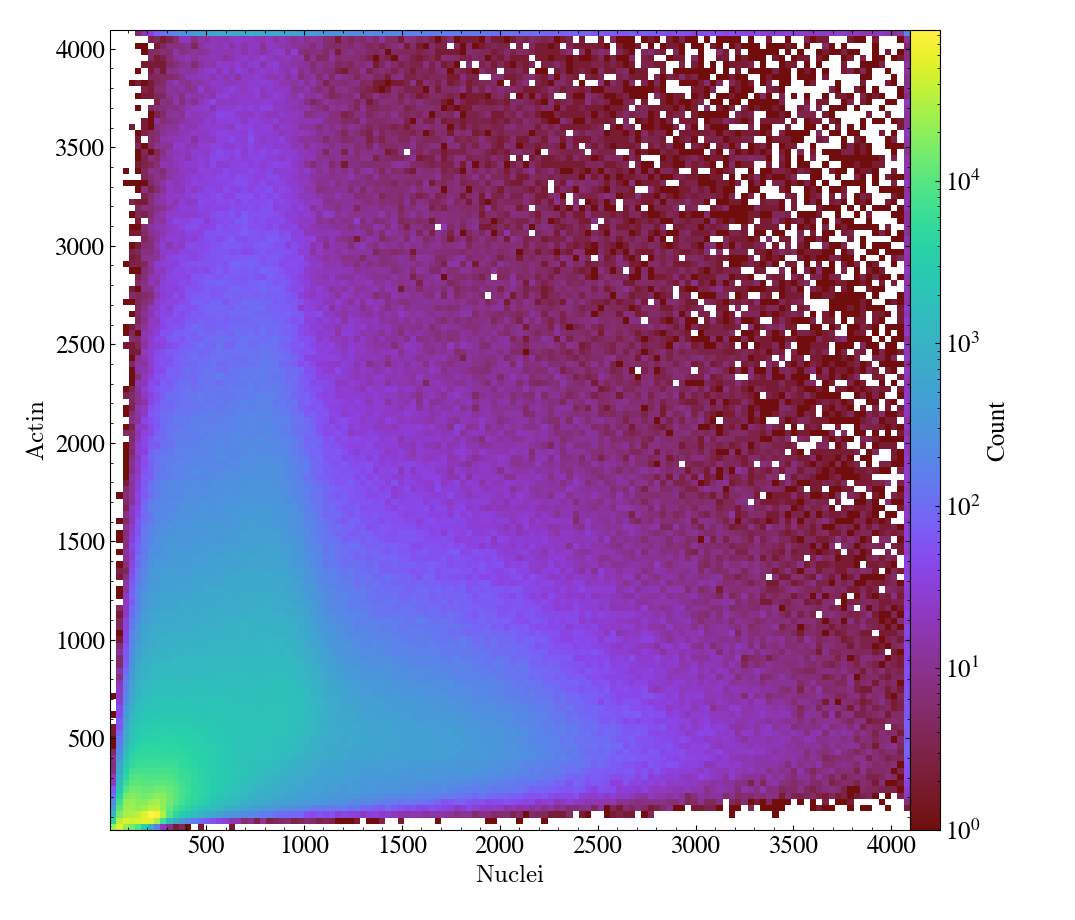

In [6]:
pp = yt.PhasePlot(ds, ('stream', 'nuclei'), ('stream', 'actin'), ('index', 'ones'), weight_field=None)
pp.set_log(('stream', 'nuclei'), False)
pp.set_log(('stream', 'actin'), False)
pp.set_colorbar_label(('index', 'ones'), 'Count')
pp.show()


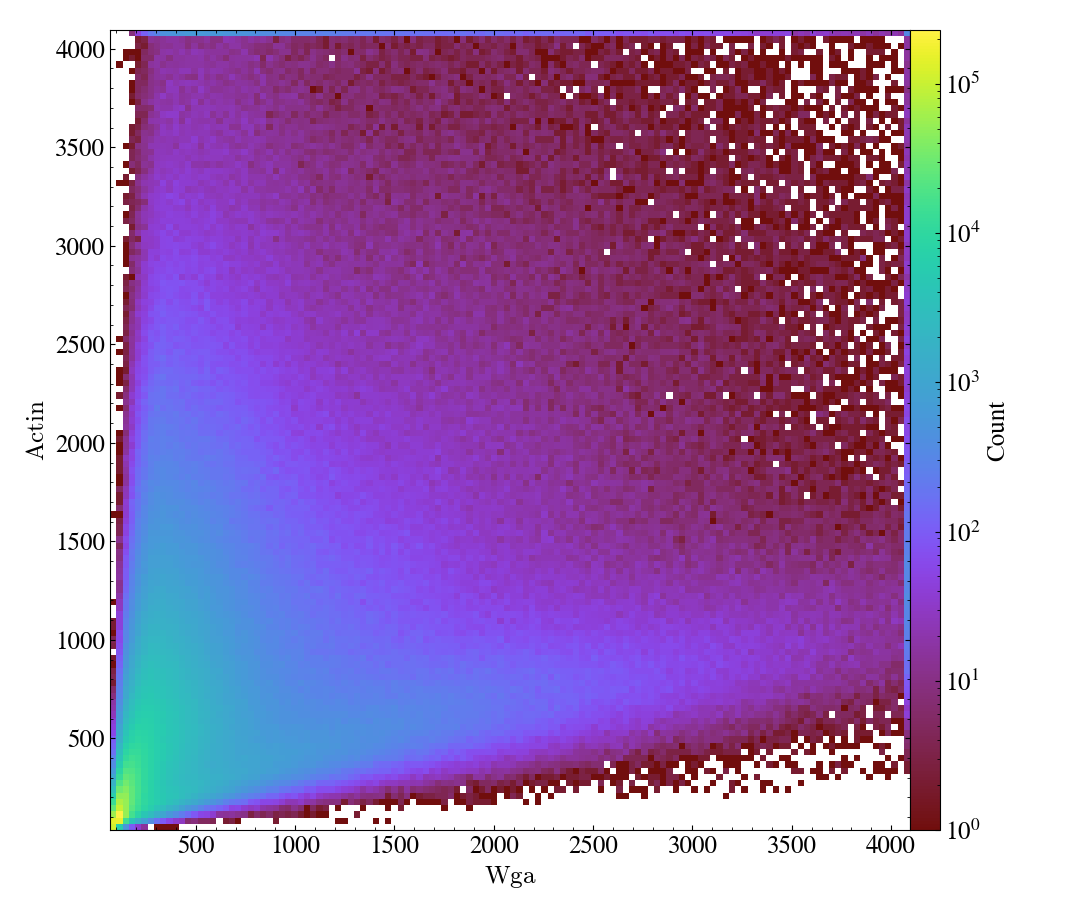

In [7]:
pp = yt.PhasePlot(ds, ('stream', 'WGA'), ('stream', 'actin'), ('index', 'ones'), weight_field=None)
pp.set_log(('stream', 'WGA'), False)
pp.set_log(('stream', 'actin'), False)
pp.set_colorbar_label(('index', 'ones'), 'Count')
pp.show()


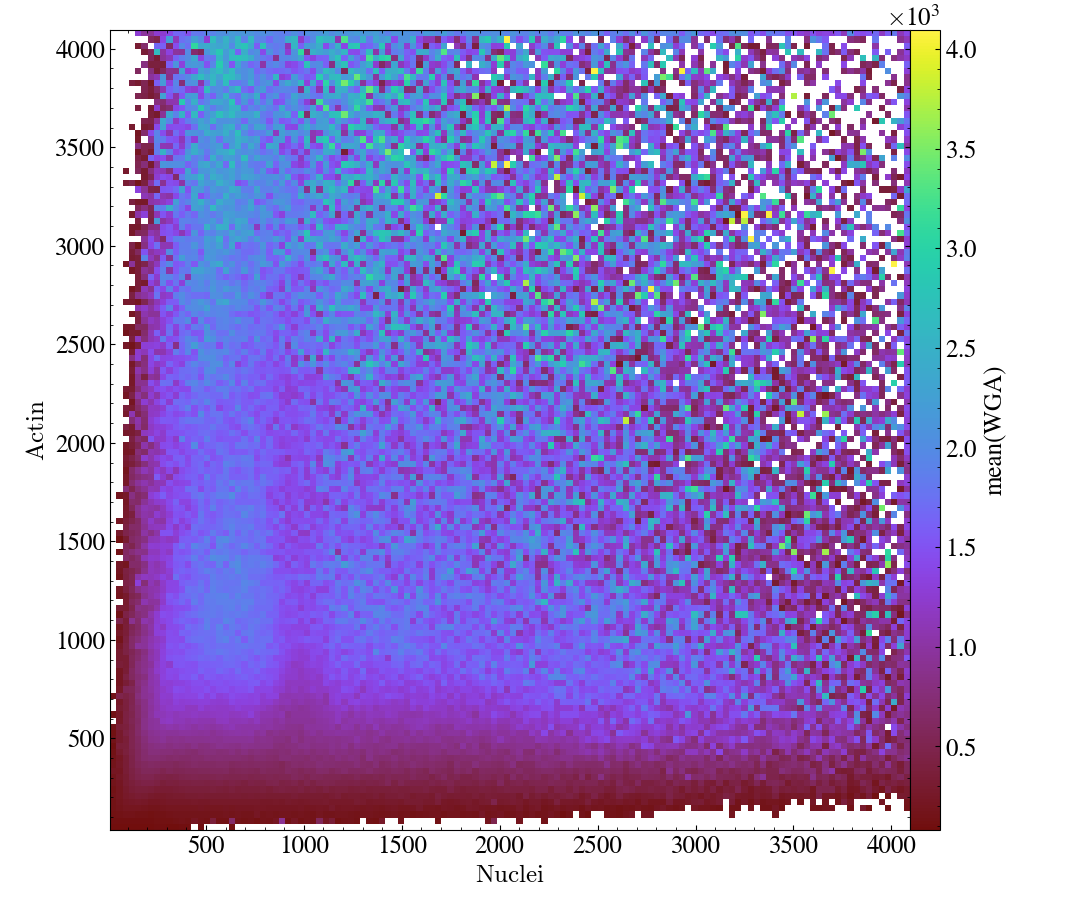

In [8]:
pp = yt.PhasePlot(ds, ('stream', 'nuclei'), ('stream', 'actin'), ('stream', 'WGA'), weight_field=('stream', 'WGA'))
pp.set_log(('stream', 'nuclei'), False)
pp.set_log(('stream', 'actin'), False)
pp.set_log(('stream', 'WGA'), False)
pp.set_colorbar_label(('stream', 'WGA'), 'mean(WGA)')
pp.show()


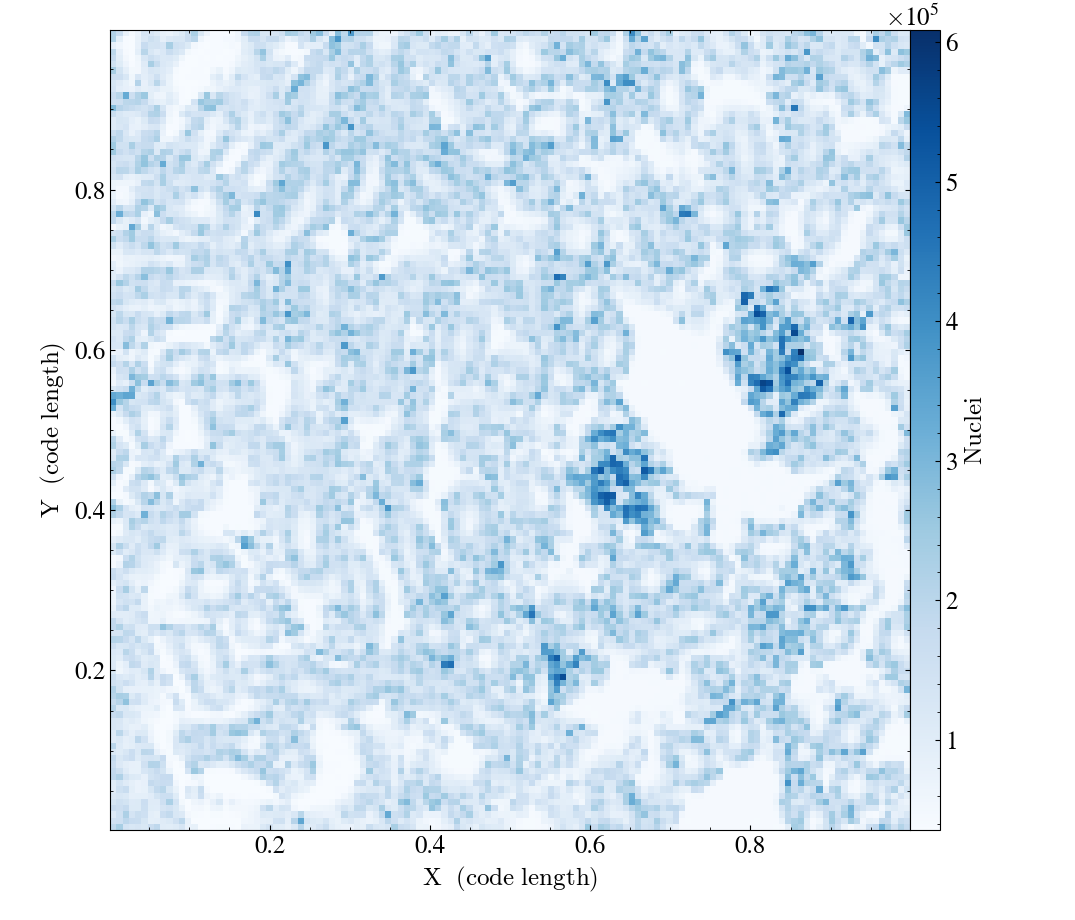

In [9]:
# this ends up kinda like a projection.
pp = yt.PhasePlot(ds, ('index', 'x'), ('index', 'y'), ('stream', 'nuclei'), weight_field=None)
pp.set_log(('stream', 'nuclei'), False)
pp.set_cmap(('stream', 'nuclei'), 'Blues')
# pp.set_log(('stream', 'actin'), False)
# pp.set_colorbar_label(('stream', 'nuclei'), 'nuclei')
pp.show()

# BUG NOTE: above is flipped, likely need to reverse for image-coords in napari? compare to:

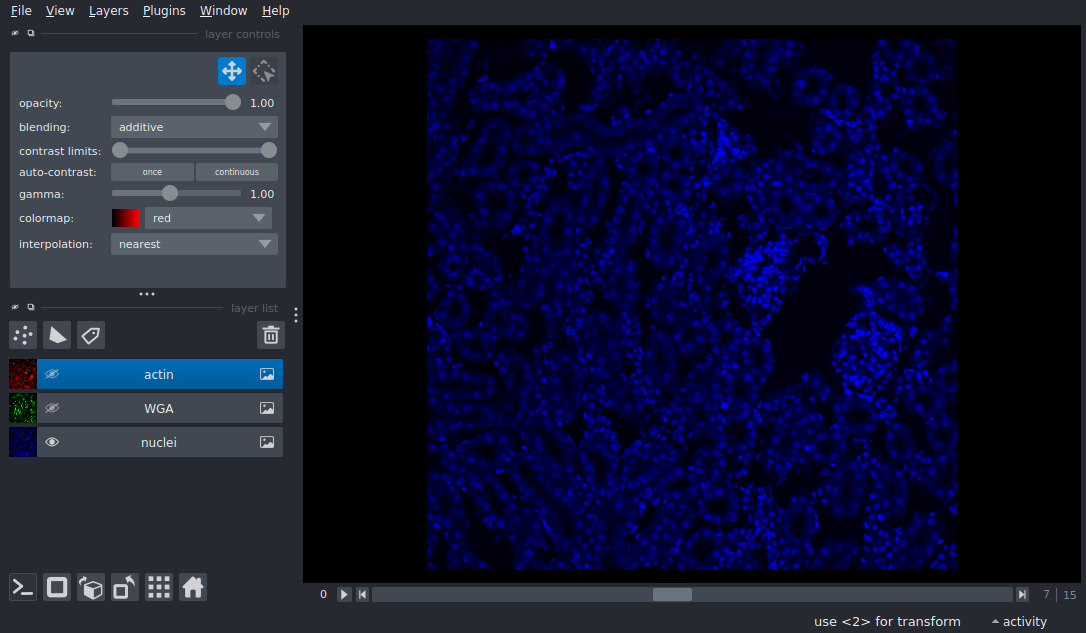

In [10]:
v.layers['actin'].visible=False
v.layers['WGA'].visible=False
from napari.utils import nbscreenshot
nbscreenshot(v) 

In [22]:
p = pp.plots[pp.fields[0]]
p.figure

<Figure size 1075x920 with 2 Axes>